# Final Project Submission

Please fill out:
* Student name: Elizabeth Kiilu
* Student pace: Part Time
* Scheduled project review date/time: 21/7/2025
* Instructor name: Christine Kirimi
* Blog post URL:

## INTRODUCTION

African Airways Co. wants to venture into the airplanes business within its region.The vision is to purchase and operate airplanes for commercial and private clients.The company has taken a data driven apporach to make critical decisions for the set-up and onward operation of this new venture, based on assessment of risk factors associated with operating equipment (airplane) and selection of the most risk-averse and profitable model of airplane to launch this business.

This analysis aims at bringing out assessed data that has been modelled to:
1-
2 -Highlight the risks associated with selected airplanes that can be deployed.
3 - Actionable insights to help make decisions for the new business.

## 1. Accessing and Assessing the Aviation data

In [57]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [58]:
#reading our data

df= pd.read_csv('Aviation_Data.csv')
df.head()


C:\Users\kgn70877\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [59]:
# To understand the columns type and check for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

*After assessing the data and given the objective of our analysis, I deemed the following columns uneccesary for the study or had lots of null values hence to be dropped to allow for clarity while analysing data. The columns incude : Event Id, Event date, accident number,latitude, longitude, FAR.Description, Report.Status, Airport.code , Airport.name,schedule, Air.carrier

In [60]:
# Removing unnecessary columns with reference to the objective of our analysis and columns with more than 50% of null values

df.columns = df.columns.str.strip()
drop_cols =['Event.Id','Events.Date','Longitude','Latitude','Publication.Date','Registration.Number','Airport.Code','Event.Date','Location','Airport.Name','Accident.Number','FAR.Description','Schedule','Air.carrier','Report.Status']

df = df.drop(columns=[col for col in drop_cols if col in df.columns])
df.shape #moved from 31 to 17 columns


(90348, 17)

## 2. Exploring Data Analysis of our remaining columns

In [61]:
# filling critical columns with '0' value to allow for usability of the data

col_injury = ['Total.Fatal.Injuries', 'Total.Serious.Injuries','Total.Minor.Injuries', 'Total.Uninjured','Number.of.Engines']

df[col_injury]= df[col_injury].fillna(0)

In [62]:
# To check distinct values in the Injury.Severity column

df['Injury.Severity'].unique()# only Fatal injury has counts attached to it . requires separation to enhance analysis

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

In [63]:
#To separate the counts in fatal from the status string 'Fatal' by creating a column of severity_counts and filling all the gaps with 0

df['Severity_Counts'] = df['Injury.Severity'].str.extract(r'Fatal\((\d+)\)').astype(float) #used float because int brought error
df['Severity_Counts'] = df['Severity_Counts'].fillna(0)

In [64]:
# Other critical columns that do not have numerical values but have the 'NAN', we can fill the 'NAN' part with 'Unknown' for grouping purposes ahead

fill_cols = ['Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight','Aircraft.Category', 'Engine.Type','Injury.Severity', 'Aircraft.damage','Country','Make','Model','Amateur.Built']
df[fill_cols] = df[fill_cols].fillna("Unknown")

In [65]:
# to finally check our dataset again before analysis
df.info()
# we now have no null values and our data is ready for analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Country                 90348 non-null  object 
 2   Injury.Severity         90348 non-null  object 
 3   Aircraft.damage         90348 non-null  object 
 4   Aircraft.Category       90348 non-null  object 
 5   Make                    90348 non-null  object 
 6   Model                   90348 non-null  object 
 7   Amateur.Built           90348 non-null  object 
 8   Number.of.Engines       90348 non-null  float64
 9   Engine.Type             90348 non-null  object 
 10  Purpose.of.flight       90348 non-null  object 
 11  Total.Fatal.Injuries    90348 non-null  float64
 12  Total.Serious.Injuries  90348 non-null  float64
 13  Total.Minor.Injuries    90348 non-null  float64
 14  Total.Uninjured         90348 non-null

## 3.Conducting Data Analysis

### A) Assessing aircraft types and associated high risk factors(Catastrophic)

In [66]:
#Combining Aircraft make and model (combining the two to have the specific aircraft)
df['Aircraft_Type'] = df['Make'].astype(str) + ' ' + df['Model'].astype(str) # combining the two columns

# Exploring the total Fatal and Serious injuries by adding a total catastrophic  injury column

df['Total.catastrophic. Injuries']=(df['Total.Fatal.Injuries'] +df['Total.Serious.Injuries'])


In [67]:
#Making assessments from a comibination of factors associated with catastrophic injuries

catastrophic_incidence_factors=  df.groupby(['Aircraft_Type','Broad.phase.of.flight','Amateur.Built', 'Investigation.Type','Purpose.of.flight'])['Total.catastrophic. Injuries'].sum().sort_values(ascending=False).reset_index()
catastrophic_incidence_factors.head(10)# showing top 10 catastrophic incidences by Aircraft type

,Aircraft_Type,Broad.phase.of.flight,Amateur.Built,Investigation.Type,Purpose.of.flight,Total.catastrophic. Injuries
0,BOEING 737,Unknown,No,Accident,Unknown,1691.0
1,Boeing 737-200,Unknown,No,Accident,Unknown,879.0
2,BOEING 777 - 206,Unknown,No,Accident,Unknown,534.0
3,Boeing MD-82,Unknown,No,Accident,Unknown,403.0
4,AIRBUS A321,Unknown,No,Accident,Unknown,381.0
5,Tupolev TU-154,Unknown,No,Accident,Unknown,349.0
6,Boeing 747-168,Unknown,No,Accident,Unknown,349.0
7,AIRBUS A330,Unknown,No,Accident,Unknown,331.0
8,Boeing 747-121,Unknown,No,Accident,Unknown,272.0
9,Airbus Industrie A300B4-605R,Takeoff,No,Accident,Unknown,265.0


### B) Assessing aircraft types and associated minor risks

In [68]:
#Making assessments from a comibination of factors associated with minor injuries
minor_incidence_factors=  df.groupby(['Aircraft_Type','Broad.phase.of.flight','Amateur.Built', 'Investigation.Type','Purpose.of.flight'])['Total.Minor.Injuries'].sum().sort_values(ascending=False).reset_index()

minor_incidence_factors.head(10)# showing top 10 minor incidences by Aircraft type

,Aircraft_Type,Broad.phase.of.flight,Amateur.Built,Investigation.Type,Purpose.of.flight,Total.Minor.Injuries
0,Boeing 747-2B6B,Unknown,Yes,Incident,Unknown,380.0
1,Mcdonnell Douglas MD-11,Unknown,No,Accident,Unknown,216.0
2,Boeing 747-122,Cruise,No,Accident,Unknown,178.0
3,Mcdonnell Douglas DC-10-10,Cruise,No,Accident,Unknown,147.0
4,Piper PA-28-140,Takeoff,No,Accident,Personal,128.0
5,Mcdonnell Douglas MD-11,Cruise,No,Accident,Unknown,122.0
6,Mcdonnell Douglas MD-82,Unknown,No,Accident,Unknown,84.0
7,Cessna 208B,Unknown,No,Accident,Unknown,77.0
8,BOEING 737,Unknown,No,Accident,Unknown,75.0
9,Boeing 737-824,Cruise,No,Accident,Unknown,71.0


### C) Assessing aircraft types with associated low risk factors

In [69]:
#Making assessments from a comibination of factors associated with uninjuries

lowrisk_incidence_factors=  df.groupby(['Aircraft_Type','Broad.phase.of.flight','Amateur.Built', 'Investigation.Type','Purpose.of.flight'])['Total.Uninjured'].sum().sort_values(ascending=False).reset_index()

lowrisk_incidence_factors.head(10)# showing top 10 incidences no injuries by Aircraft type

,Aircraft_Type,Broad.phase.of.flight,Amateur.Built,Investigation.Type,Purpose.of.flight,Total.Uninjured
0,BOEING 737,Unknown,No,Incident,Unknown,14241.0
1,BOEING 737,Unknown,No,Accident,Unknown,6837.0
2,BOEING 777,Unknown,No,Incident,Unknown,5920.0
3,BOEING 777,Unknown,No,Accident,Unknown,2726.0
4,BOEING 767,Unknown,No,Incident,Unknown,2468.0
5,BOEING 767,Unknown,No,Accident,Unknown,2148.0
6,Boeing 737,Unknown,No,Accident,Unknown,2026.0
7,AIRBUS A320,Unknown,No,Incident,Unknown,1825.0
8,BOEING 787,Unknown,No,Incident,Unknown,1689.0
9,Boeing 747-400,Unknown,No,Accident,Unknown,1521.0


#### High Risk Fatalities Aircraft

## 4.Combining analysis for assessment

In [70]:
# From the data given, the following aircrafts had the highest value counts meaning, they were the most commonly used aircrafts


most_common_operated_aircraft =df['Aircraft_Type'].value_counts().reset_index()
most_common_operated_aircraft.columns = ['Aircraft Type', 'Total Number']
most_common_operated_aircraft.index.name = 'Index'
most_common_operated_aircraft.head(10)

,Aircraft Type,Total Number
Index,,
0,Cessna 152,2168
1,Unknown Unknown,1504
2,Cessna 172,1254
3,Cessna 172N,996
4,Piper PA-28-140,812
5,Cessna 150,716
6,Cessna 172M,667
7,Cessna 172P,597
8,Piper PA-18,539


In [71]:
#selecting top 5 of most common operated aircrafts, ommiting the unknown type as indicated above
most_common_selected_aircrafts =['Cessna 152','Cessna 172','Cessna 172N','Piper PA-28-140','Cessna 150']

# creating a dataframe
most_common_selected_flights_df = df[df['Aircraft_Type'].isin (most_common_selected_aircrafts)]

# Tracking the safety records of the most common operated flights selected
safety_record_most_common_aircraft= most_common_selected_flights_df.groupby(['Aircraft_Type','Investigation.Type'])[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries',
'Total.Uninjured']].sum().reset_index()

safety_record_most_common_aircraft

,Aircraft_Type,Investigation.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,Cessna 150,Accident,78.0,104.0,182.0,671.0
1,Cessna 150,Incident,0.0,0.0,2.0,3.0
2,Cessna 152,Accident,349.0,168.0,404.0,2146.0
3,Cessna 152,Incident,0.0,0.0,1.0,29.0
4,Cessna 172,Accident,231.0,192.0,325.0,1728.0
5,Cessna 172,Incident,0.0,0.0,0.0,10.0
6,Cessna 172N,Accident,365.0,150.0,320.0,1174.0
7,Cessna 172N,Incident,0.0,0.0,0.0,6.0
8,Piper PA-28-140,Accident,284.0,219.0,374.0,729.0
9,Piper PA-28-140,Incident,0.0,0.0,0.0,3.0


In [72]:
# checking most common operated aircraft track record by investigation type = 'Accident'

common_aircraft_accident_safety_record = most_common_selected_flights_df[most_common_selected_flights_df['Investigation.Type'] == 'Accident'
].groupby(['Aircraft_Type', 'Investigation.Type'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
].sum().reset_index()

common_aircraft_accident_safety_record 

,Aircraft_Type,Investigation.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,Cessna 150,Accident,78.0,104.0,182.0,671.0
1,Cessna 152,Accident,349.0,168.0,404.0,2146.0
2,Cessna 172,Accident,231.0,192.0,325.0,1728.0
3,Cessna 172N,Accident,365.0,150.0,320.0,1174.0
4,Piper PA-28-140,Accident,284.0,219.0,374.0,729.0


In [73]:
# checking most common operated aircraft track record by investigation type = 'Incident'

common_aircraft_incident_safety_record = most_common_selected_flights_df[most_common_selected_flights_df['Investigation.Type'] == 'Incident'
].groupby(['Aircraft_Type', 'Investigation.Type'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
].sum().reset_index()

common_aircraft_incident_safety_record 

,Aircraft_Type,Investigation.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,Cessna 150,Incident,0.0,0.0,2.0,3.0
1,Cessna 152,Incident,0.0,0.0,1.0,29.0
2,Cessna 172,Incident,0.0,0.0,0.0,10.0
3,Cessna 172N,Incident,0.0,0.0,0.0,6.0
4,Piper PA-28-140,Incident,0.0,0.0,0.0,3.0


In [74]:
#Ratio of incidences that have occured in most common operated flight to uninjured incidences recorded

total_incidences_mostcommon = most_common_selected_flights_df[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries',
]].sum().sum()
total_uninjured_mostcommon = most_common_selected_flights_df['Total.Uninjured'].sum()


Safety_Percentage =100-(total_incidences_mostcommon/total_uninjured_mostcommon)*100

print(f"Total Uninjured: {total_uninjured_mostcommon}")
print(f"Total Injury Incidents: {total_incidences_mostcommon}")
print(f"Safety Percentage (Injured / Uinjured): {Safety_Percentage:.2f} %")


Total Uninjured: 6499.0
Total Injury Incidents: 3748.0
Safety Percentage (Injured / Uinjured): 42.33 %


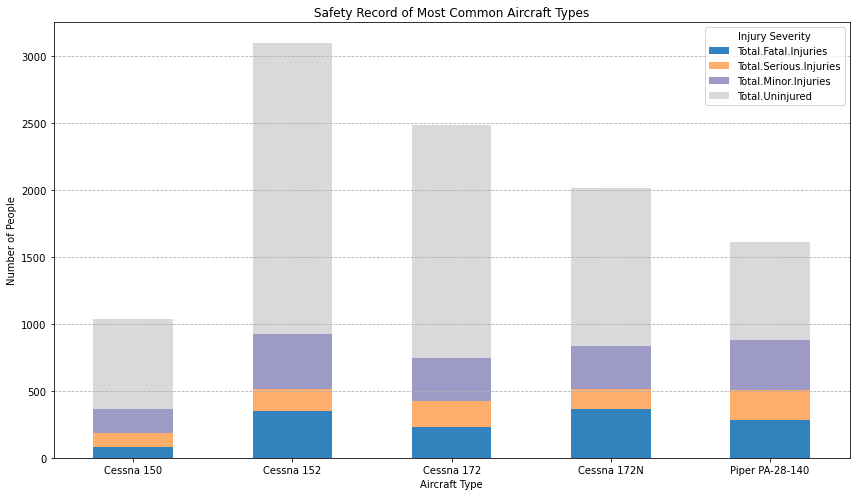

In [75]:

# Pivoting for easier plotting (sum across all Investigation Types per Aircraft Type)
pivot_df = safety_record_most_common_aircraft.groupby('Aircraft_Type')[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries',
'Total.Uninjured']].sum()

# Plotting
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20c')

plt.title('Safety Record of Most Common Aircraft Types')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of People')
plt.xticks(rotation=360)
plt.legend(title='Injury Severity')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')

plt.show()

In [76]:
#Track record of top 5 flights with known lowrisk factors

selected_lowrisk_aircraft =lowrisk_incidence_factors['Aircraft_Type'].head(10).tolist()
selected_lowrisk_aircraft_df= df[df['Aircraft_Type'].isin (selected_lowrisk_aircraft)]

#Assessing lowrisk incident aircraft type safety record
lowrisk_safety_record=selected_lowrisk_aircraft_df.groupby(['Aircraft_Type','Investigation.Type'])[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries',
'Total.Uninjured']].sum().reset_index()

lowrisk_safety_record

,Aircraft_Type,Investigation.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,AIRBUS A320,Accident,170.0,4.0,9.0,809.0
1,AIRBUS A320,Incident,0.0,6.0,0.0,1825.0
2,BOEING 737,Accident,1348.0,350.0,75.0,6839.0
3,BOEING 737,Incident,0.0,30.0,1.0,14245.0
4,BOEING 767,Accident,0.0,60.0,16.0,2148.0
5,BOEING 767,Incident,0.0,0.0,0.0,2468.0
6,BOEING 777,Accident,0.0,23.0,17.0,2726.0
7,BOEING 777,Incident,0.0,0.0,1.0,5920.0
8,BOEING 787,Accident,0.0,1.0,2.0,443.0
9,BOEING 787,Incident,0.0,4.0,0.0,1694.0


In [77]:
# checking lowrisk track record for Aircraft_Type by investigation type = 'Accident'

lowrisk_accident_safety_record = selected_lowrisk_aircraft_df[selected_lowrisk_aircraft_df['Investigation.Type'] == 'Accident'
].groupby(['Aircraft_Type', 'Investigation.Type'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
].sum().reset_index()

lowrisk_accident_safety_record

,Aircraft_Type,Investigation.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,AIRBUS A320,Accident,170.0,4.0,9.0,809.0
1,BOEING 737,Accident,1348.0,350.0,75.0,6839.0
2,BOEING 767,Accident,0.0,60.0,16.0,2148.0
3,BOEING 777,Accident,0.0,23.0,17.0,2726.0
4,BOEING 787,Accident,0.0,1.0,2.0,443.0
5,Boeing 737,Accident,0.0,8.0,15.0,2576.0
6,Boeing 747-400,Accident,83.0,43.0,40.0,3501.0


In [78]:
# checking Fatal track record for Aircraft_Type by investigation type = 'Incident'

lowrisk_incident_safety_record  = selected_lowrisk_aircraft_df[selected_lowrisk_aircraft_df['Investigation.Type'] == 'Incident'
].groupby(['Aircraft_Type', 'Investigation.Type'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
].sum().reset_index()

lowrisk_incident_safety_record 

,Aircraft_Type,Investigation.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,AIRBUS A320,Incident,0.0,6.0,0.0,1825.0
1,BOEING 737,Incident,0.0,30.0,1.0,14245.0
2,BOEING 767,Incident,0.0,0.0,0.0,2468.0
3,BOEING 777,Incident,0.0,0.0,1.0,5920.0
4,BOEING 787,Incident,0.0,4.0,0.0,1694.0
5,Boeing 737,Incident,0.0,0.0,0.0,1781.0
6,Boeing 747-400,Incident,0.0,0.0,0.0,1746.0


In [79]:
#Ratio of incidences that have occured in most common operated flight to uninjured incidences recorded

total_incidences_lowrisk =selected_lowrisk_aircraft_df[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries',
]].sum().sum()
total_uninjured_lowrisk =selected_lowrisk_aircraft_df['Total.Uninjured'].sum()


lowrisk_safety_ratio = 100-(total_incidences_lowrisk/total_uninjured_lowrisk)*100

print(f"Total Uninjured: {total_uninjured_mostcommon}")
print(f"Total Injury Incidents: {total_incidences_mostcommon}")
print(f"Safety Percentage (Injured / Uinjured): {lowrisk_safety_ratio:.2f} %")


Total Uninjured: 6499.0
Total Injury Incidents: 3748.0
Safety Percentage (Injured / Uinjured): 95.27 %


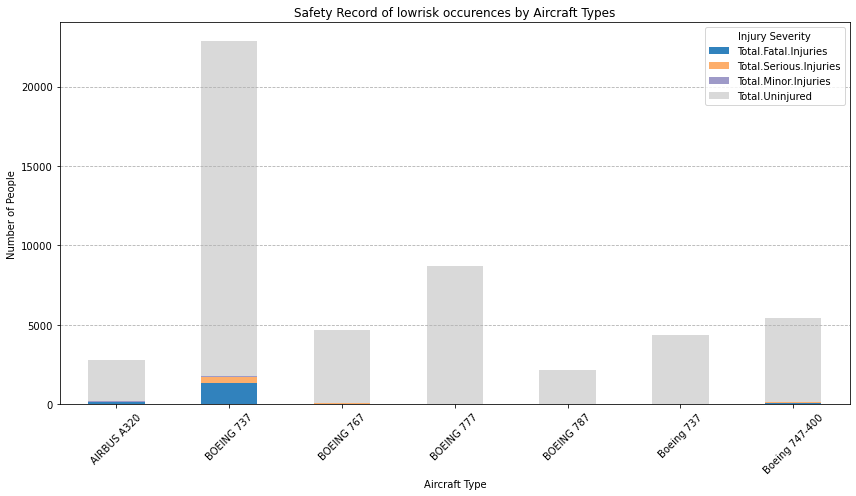

In [80]:
# Pivoting for easier plotting (sum across all Investigation Types per Aircraft Type)

lowrisk_df = lowrisk_safety_record.groupby('Aircraft_Type')[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries',
'Total.Uninjured']].sum()

# Plotting
lowrisk_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20c')

plt.title('Safety Record of lowrisk occurences by Aircraft Types')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.legend(title='Injury Severity')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')

plt.show()

SUMMARY ANALYSIS ON MOST COMMON AIRCRAFT OPERATED AND THE LOW RISK AIRCRAFT OPERATED
1. MOST COMMON AIRCRAFTS OPERATED

If African Airways Co. would like to consider the most common aircraft operated as their choice of flight based on information assessed:
a)Most common aircraft selected have lower numbers of passangers, maybe due to the flights being smaller
b)further analysis should be done to know why they are common. It could be that they are cheaper to acquire
c) The safety percentage for these aircraft is however low at 42%

If African Airways Co.rather consi
der the low risk aircraft operated as their choice of flight based on information assessed:
a) They appear to move large volumes of passangers
b)The safety record is quite impressive at95.27%

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Investigation.Type            90348 non-null  object 
 1   Country                       90348 non-null  object 
 2   Injury.Severity               90348 non-null  object 
 3   Aircraft.damage               90348 non-null  object 
 4   Aircraft.Category             90348 non-null  object 
 5   Make                          90348 non-null  object 
 6   Model                         90348 non-null  object 
 7   Amateur.Built                 90348 non-null  object 
 8   Number.of.Engines             90348 non-null  float64
 9   Engine.Type                   90348 non-null  object 
 10  Purpose.of.flight             90348 non-null  object 
 11  Total.Fatal.Injuries          90348 non-null  float64
 12  Total.Serious.Injuries        90348 non-null  float64
 13  T

In [82]:
# For purpose of use in Tableau, given the changed information from the original dataset issued for the assignment

df.to_csv("cleaned_aviation_data.csv", index=False)